In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf

In [19]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=dt.datetime.now())
# Show teh data
df
# Keep only the first level (e.g., 'Adj Close', 'Close', etc.)
df.columns = df.columns.get_level_values(0)

df.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed


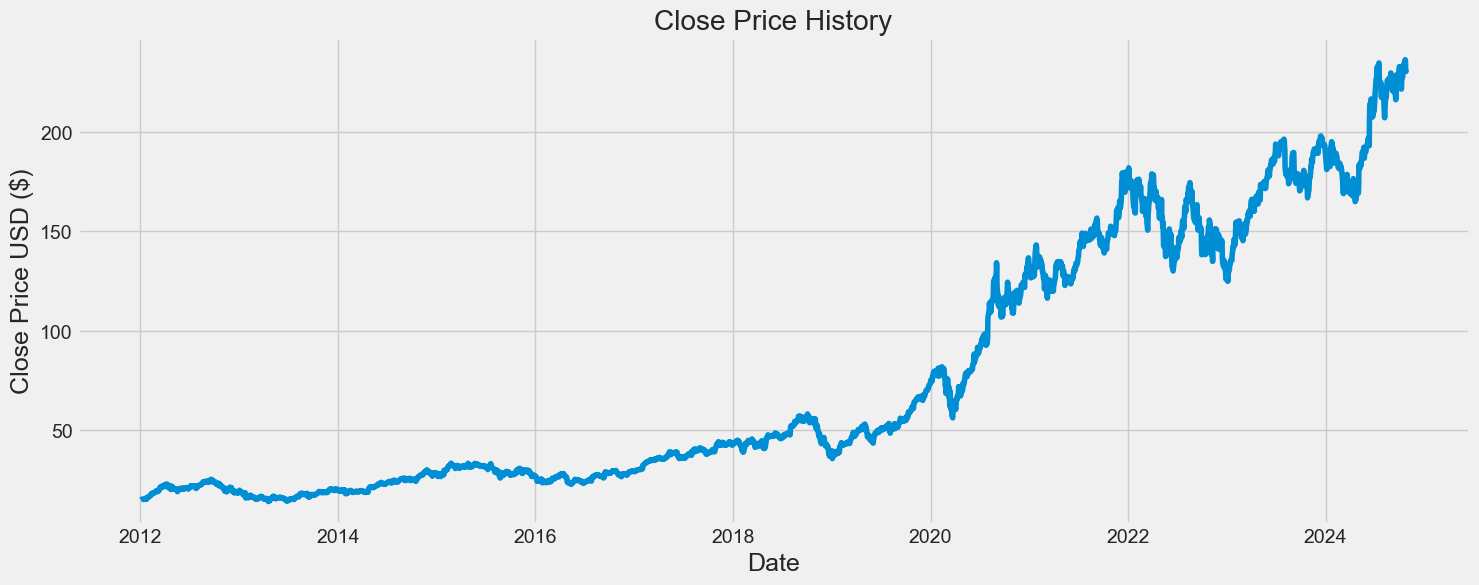

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3064

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00332215],
       [0.00367683],
       [0.00441348],
       ...,
       [0.97429588],
       [0.97344213],
       [0.97721685]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00477779, 0.00591888, 0.00479545,
       0.00900831, 0.00868252, 0.00910782, 0.01002743, 0.01058432,
       0.01053778, 0.01036606, 0.0110979 , 0.0117864 , 0.01256638,
       0.01382623, 0.01647271, 0.01651284, 0.01798614, 0.0190871 ,
       0.01719492, 0.01792354, 0.0179091 , 0.01995214, 0.01966165,
       0.02019929, 0.02116544, 0.02170309, 0.02325182, 0.02438006,
       0.02470586, 0.02481981, 0.02289072, 0.02242529, 0.02249431,
       0.02430785, 0.02481821, 0.02591436, 0.02849824, 0.03194558,
       0.0313004 , 0.03130201, 0.03379442, 0.03457441, 0.03401911,
       0.03351196, 0.03298395, 0.0347381 , 0.03594178, 0.03644572])]
[0.03520031440172121]

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00

# Predicting by LSTM :

In [48]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model1_1 = Sequential()
model1_1.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model1_1.add(LSTM(64, return_sequences=False))
model1_1.add(Dense(25))
model1_1.add(Dense(1))

# Compile the model1_1
model1_1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model1_1
model1_1.fit(x_train, y_train, batch_size=32, epochs=1)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.0164


In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model1_2 = Sequential()
model1_2.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model1_2.add(LSTM(64, return_sequences=False))
model1_2.add(Dense(25))
model1_2.add(Dense(1))

# Compile the model1_2
model1_2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model1_2
model1_2.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3004/3004 ━━━━━━━━━━━━━━━━━━━━ 114s 36ms/step - loss: 0.0024


# Predicting by 1DCNN :

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Build the 1D CNN model
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(1))

# Compile the model2
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model2
model2.fit(x_train, y_train, batch_size=32, epochs=1)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0228


In [53]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Initialize an empty DataFrame for predictions_res
predictions_res = pd.DataFrame(index=data.index[training_data_len:])

model_list = [model1_1, model1_2, model2]
for model in model_list:
    # Get the model's predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    # Add the predictions to the DataFrame with appropriate column names
    predictions_df = pd.DataFrame(predictions, columns=[f'Prediction_{model.name}'], index=data.index[training_data_len:])
    predictions_res = pd.concat([predictions_res, predictions_df], axis=1)

# Get the root mean squared error (RMSE) for each model
for model in model_list:
    predictions = predictions_res[f'Prediction_{model.name}'].values
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print(f'RMSE for {model.name}: {rmse}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE for sequential_5: 32.00971262630726
RMSE for sequential_7: 31.3506497711858
RMSE for sequential_4: 31.3676331907942


In [54]:
predictions_res

,Prediction_sequential_5,Prediction_sequential_7,Prediction_sequential_4
Date,,,
2024-03-08 00:00:00+00:00,177.240356,174.643829,186.882187
2024-03-11 00:00:00+00:00,176.042648,173.548203,186.871338
2024-03-12 00:00:00+00:00,175.031403,173.367310,186.779678
2024-03-13 00:00:00+00:00,174.221130,173.683319,186.741959
2024-03-14 00:00:00+00:00,173.499969,173.774872,186.183548
...,...,...,...
2024-10-21 00:00:00+00:00,223.303497,226.757050,222.236557
2024-10-22 00:00:00+00:00,224.000290,227.731918,222.377777
2024-10-23 00:00:00+00:00,224.705933,228.439957,222.297028


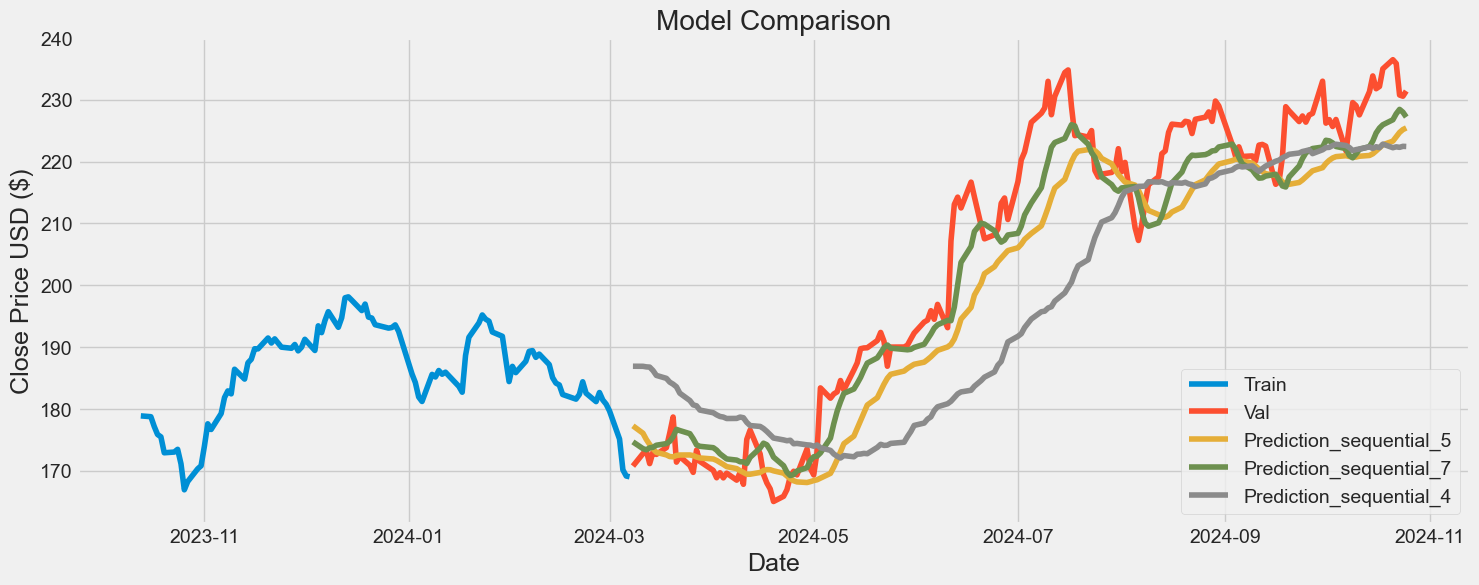

In [55]:
# Plot the data
train = data[training_data_len-100:training_data_len]
valid = data[training_data_len:]
valid = valid.join(predictions_res)

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Val')

# Plot predictions from each model
for column in predictions_res.columns:
    plt.plot(valid[column], label=column)

plt.legend(loc='lower right')
plt.show()